# CHURN ANALYTICS

## Business Understanding

SyriaTel a telecommunications company faces a significant challenge with customer churn, which undermines revenue and operational efficiency. Retaining existing customers is crucial, as acquiring new ones is often more expensive. To tackle this issue, there is need to analyze the key factors influencing churn and develop a predictive model to identify at-risk customers.




## Problem statement

By examining customer behavior, usage patterns, and service quality, insights that drive effective retention strategies can be uncovered. It's vital to assess service experiences, address customer complaints, and ensure competitive pricing. Creating a predictive model will allow us to categorize churn risks and engage proactively with at-risk customers through tailored offers and support.

Implementing targeted retention efforts and loyalty programs will help improve customer satisfaction and loyalty. By continuously gathering feedback, the company can refine its strategies over time.

By committing to these initiatives, SyriaTel can foster a strong, loyal customer base that supports long-term growth and profitability. Targeted retention strategies are essential for success in today’s competitive telecommunications market.

## Research Questions


1.   What are the key factors that influence customer churn at SyriaTel?
2.   Is it possible to accurately predict which customers are likely to churn based on their usage patterns and service history?
3.   How do different customer segments impact churn rates?
4.   What is the relationship between customer complaints, service quality, and churn?
5.   What retention strategies can be implemented to reduce churn and improve customer loyalty?





## Data Understanding

In [98]:
#import libraries

# Data manipulation
import pandas as pd
import numpy as np


# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import warnings

# ignore warnings
warnings.filterwarnings("ignore")

In [99]:
# Read data from csv file & create dataframe.
data = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
# Checking the first 5 rows.
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [100]:
# Check shape of dataframe
rows, cols = data.shape
print(f'The number of rows in our dataset are {rows} \nWhile the number of columns are {cols}')

The number of rows in our dataset are 3333 
While the number of columns are 21


In [101]:
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataframe has 3333 rows and 21 columns. The columns are of different data types. The summary is as follows:

*   state: the state the customer lives - string
*   account length: the number of days the customer has had an account - interger
*   area code: the area code of the customer - interger
*   phone number: the phone number of the customer - string
*   international plan: true if the customer has the international plan, otherwise false - string
*   voice mail plan: true if the customer has the voice mail plan, otherwise false - string
*   number vmail messages: the number of voicemails the customer has sent - interger
*   total day minutes: total number of minutes the customer has been in calls during the day - float
*   total day calls: total number of calls the user has done during the day - interger
*   total eve minutes: total number of minutes the customer has been in calls during the evening - float
*   total eve calls: total number of calls the customer has done during the evening - float
*   total eve charge: total amount of money the customer was charged by the Telecom company for calls during the evening - float
*   total night minutes: total number of minutes the customer has been in calls during the night - float
*   total night calls: total number of calls the customer has done during the night - interger
*   total night charge: total amount of money the customer was charged by the Telecom company for calls during the night-float
*   total intl calls: total number of international calls the customer has done - interger
*   total intl charge: total amount of money the customer was charged by the Telecom company for international calls - float
*   customer service calls: number of calls the customer has made to customer service - interger
*   churn: true if the customer terminated their contract, otherwise false - boolean
















## Data Cleaning

This section prepares the data for EDA and modeling. The dataset will be checked for:

* Duplicated rows
* missing values
* Fixing incorrect data types
* Removing outliers
* Droping irrelevant columns as they may not add to the analysis

In [103]:
#check for duplicated rows
data.duplicated().sum()

0

There are no duplicates.

In [104]:
# Check for missing values
data.isnull().mean()

,0
state,0.0
account length,0.0
area code,0.0
phone number,0.0
international plan,0.0
voice mail plan,0.0
number vmail messages,0.0
total day minutes,0.0
total day calls,0.0
total day charge,0.0


There are no missing values

In [105]:

#droping customer number column, it is contact information on the client and adds no value to the analysiss
data.drop(columns=['phone number'],axis=1,inplace=True)
# sample 3 columns
data.sample(3)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
304,AZ,136,510,no,no,0,92.0,117,15.64,253.6,77,21.56,214.1,90,9.63,10.3,10,2.78,1,False
435,MT,58,510,no,yes,29,240.4,80,40.87,118.9,91,10.11,164.2,108,7.39,11.2,3,3.02,1,False
912,IA,45,510,no,no,0,159.8,91,27.17,120.4,86,10.23,163.0,93,7.34,10.6,3,2.86,2,False


## Explanatory Data Analysis (EDA)

#### Analysis on 'churn'

* Churn will be used as the dependent variable in this analysis.
* Churn indicates if a customer has terminated their contract with SyriaTel.

churn
False    2850
True      483
Name: count, dtype: int64


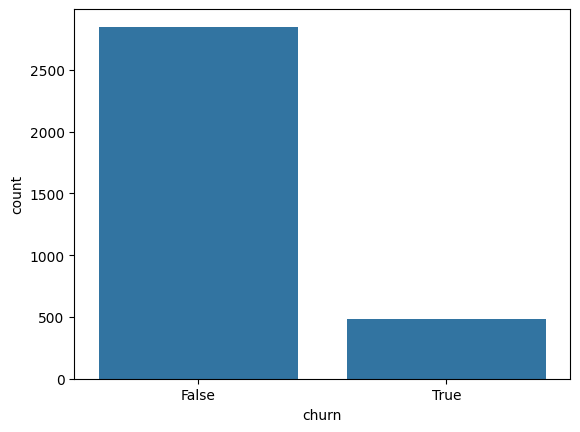

In [106]:
# Countplot of churn feature
print(data.churn.value_counts())
sns.countplot(data=data, x='churn');

* 483 have terminated their contract with SyriaTel. That is 14.5% of customers lost.
* The distribution of the binary classes shows a data imbalance.

#### Analysis on "area code"


In [110]:
import plotly.express as px

# Convert 'area code' to string
data['area code'] = data['area code'].astype(str)

# Get the count of each area code
area_counts = data['area code'].value_counts().reset_index()
area_counts.columns = ['area code', 'count']  # Rename columns
# Create a bar chart
figure = px.bar(area_counts,
                x='area code',  # Area codes on the x-axis (treated as strings)
                y='count',      # Counts on the y-axis
                text='count',
                title='Count of Area Codes (Treated as Strings)',
                labels={'count': 'Frequency', 'area code': 'Area Code'})
figure.write_html("area_code_distribution.html")
# Show the bar chart
figure.show()

Our analysis shows that about 50% of customers have the area code 415, while the remaining half is almost evenly split between area codes 510 and 408.

In [ ]:
# Calculate churn rate for each area code
churn_rate_by_area = data.groupby("area code")["churn"].mean() * 100
# Convert to DataFrame for better visualization
churn_rate_df = churn_rate_by_area.reset_index()
churn_rate_df.columns = ["Area Code", "Churn Rate (%)"]
# Display churn rates
print(churn_rate_df)

  Area Code  Churn Rate (%)
0       408       14.558473
1       415       14.259819
2       510       14.880952


* The churn rates across area codes 408, 415, and 510 are relatively close, but area code 510 has the highest churn rate (14.88%), followed by 408 (14.56%), and 415 has the lowest churn rate (14.26%).
* Since 415 has the highest number of customers about 50%, its slightly lower churn rate might suggest higher customer retention or satisfaction in that region.

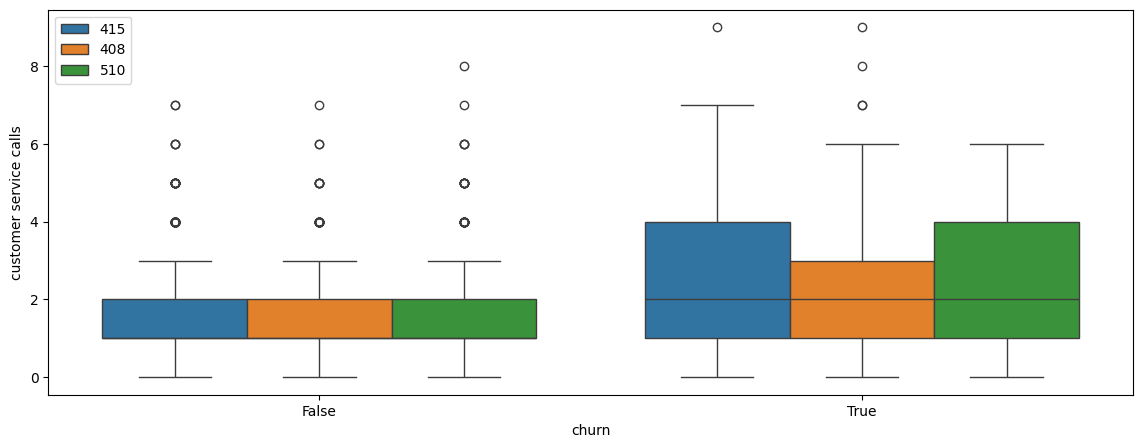

In [ ]:
# Boxplot to see which area code has the highest churn
plt.figure(figsize=(14,5))
sns.boxplot(data=data,x='churn',y='customer service calls',hue='area code');
plt.legend(loc='upper left');

* In all area codes, there are outliers amongst the customers who have not terminated their accounts.

#### International Call Charges & Call Minutes

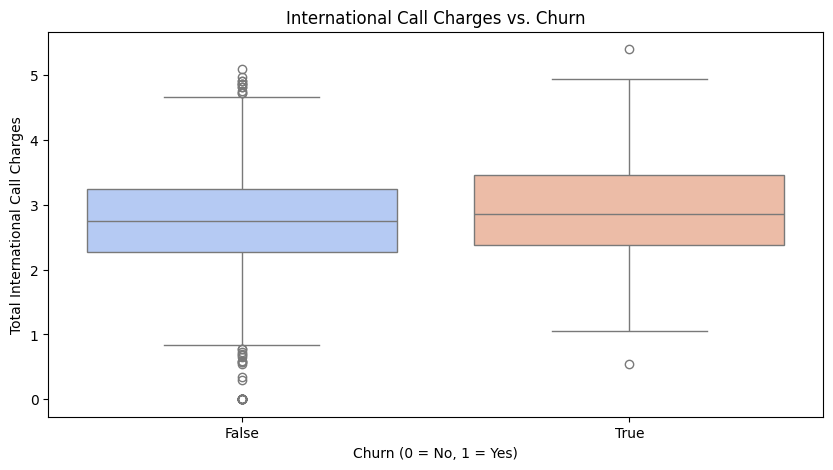

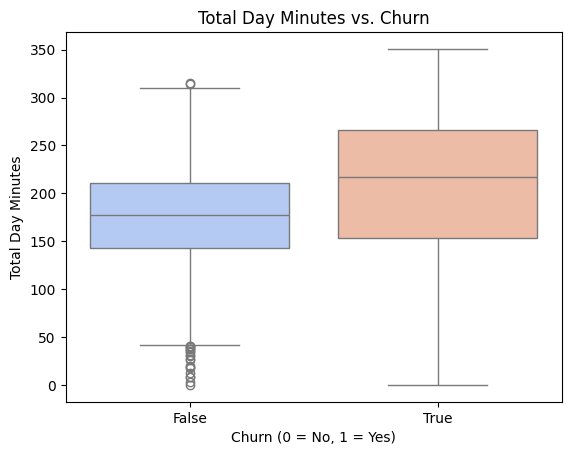

In [ ]:
plt.figure(figsize=(10,5))

# Boxplot for international call charges
sns.boxplot(x=data['churn'], y=data['total intl charge'], palette="coolwarm")
plt.title("International Call Charges vs. Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Total International Call Charges")
plt.show()

# Distribution of total call minutes
sns.boxplot(x=data['churn'], y=data['total day minutes'], palette="coolwarm")
plt.title("Total Day Minutes vs. Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Total Day Minutes")
plt.show()

Customers with higher total international call charges are more likely to churn, indicating that international calls may be too expensive or unsatisfactory, prompting customers to seek alternative providers. Additionally, customers who make fewer overall calls tend to leave more frequently, which may suggest low engagement, dissatisfaction, or a shift to alternative communication options.

#### State versus Churn

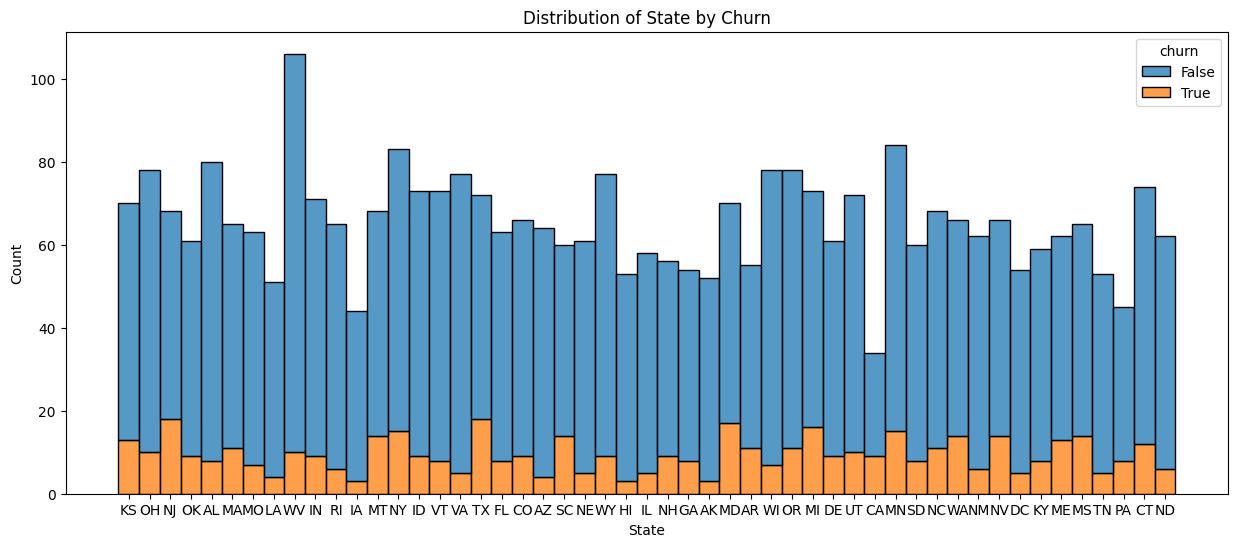

In [ ]:
# Set the figure size
plt.figure(figsize=(15, 6))
# Create the histogram plot
sns.histplot(binwidth=0.5, x="state", hue="churn", data=data, stat="count", multiple="stack")
# Add labels and title
plt.xlabel("State")  # Label for the x-axis
plt.ylabel("Count")  # Label for the y-axis
plt.title("Distribution of State by Churn")
plt.show()

It is evident that in all the different states, mostly people do not churn. We also find out that the number of churners is ver less as compared to the ones who do not churn.

#### Account length


In [ ]:
from scipy.stats import norm

def plotNormalDistribution(seriesName, titleName):

  mu = seriesName.mean()
  sigma = seriesName.std()

  density = pd.DataFrame()
  density["x"] = np.linspace(
      seriesName.min(), seriesName.max(), 100
  )
  density["pdf"] = norm.pdf(density["x"], mu, sigma)
  fig, ax = plt.subplots()
  sns.histplot(seriesName, ax=ax, kde=True, stat="density")
  ax.plot(density["x"], density["pdf"], color="red")
  plt.title(titleName)
  plt.show()

In [ ]:
accountLengthDistOfChurners = (data[data['churn'] == True]['account length'])
accountLengthDistOfNonChurners = (data[data['churn'] == False]['account length'])

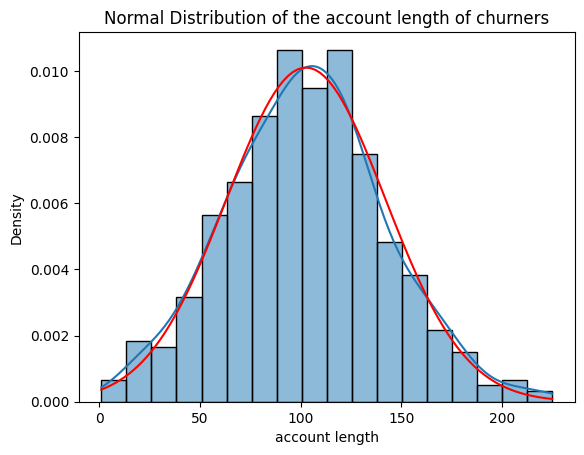

In [ ]:
plotNormalDistribution(accountLengthDistOfChurners, 'Normal Distribution of the account length of churners')

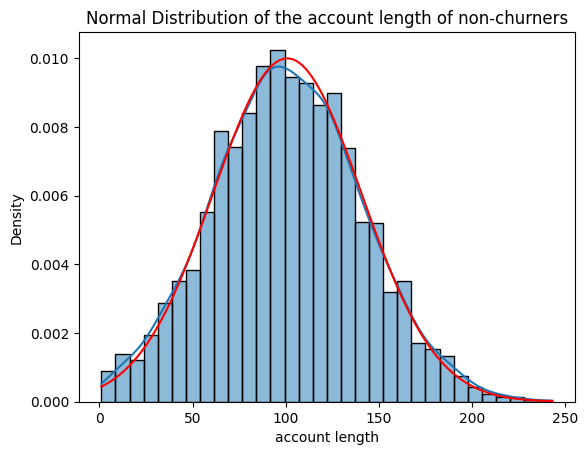

In [ ]:
plotNormalDistribution(accountLengthDistOfNonChurners, 'Normal Distribution of the account length of non-churners')

From the distributions above, we can see that in case of both churners and non-churners, the maximum people who churn have an account length of around 100. This shows that account length does not necessarily have any impact on the decision as to whether a person will churn or not.

Both follow a normal distribution.

#### Number of vmail messages

array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

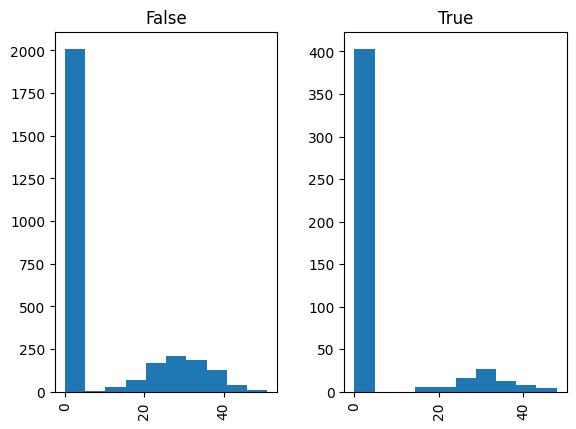

In [ ]:
data.hist(by='churn', column='number vmail messages')

The number of voice mail messages dont seem to have any correlation to whether a person will churn or not.

#### Distrubution Plots for Numeric Features

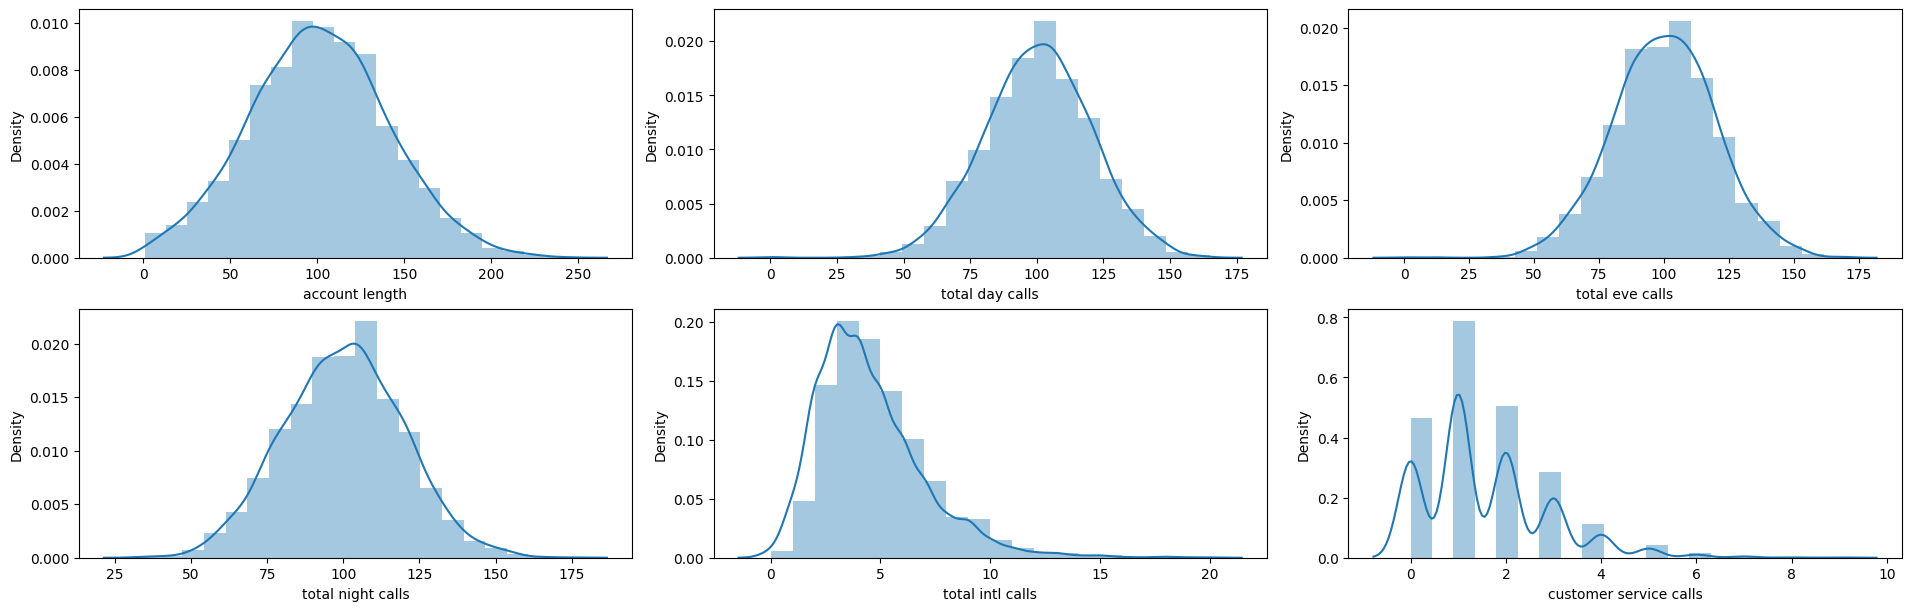

In [ ]:
f,ax=plt.subplots(2,3,figsize=(19,6),constrained_layout = True)
sns.distplot(data["account length"],bins=20,ax=ax[0,0]);

sns.distplot(data["total day calls"],bins=20,ax=ax[0,1]);

sns.distplot(data["total eve calls"],bins=20,ax=ax[0,2]);

sns.distplot(data["total night calls"],bins=20,ax=ax[1,0]);

sns.distplot(data["total intl calls"],bins=20,ax=ax[1,1]);

sns.distplot(data["customer service calls"],bins=20,ax=ax[1,2]);

* For the distribution plots of the features above, all of them except customer service calls, have a normal distribution. Total international calls seems to be skewed to the right side.
* Customer service calls had a few peaks, which indicates there were few modes in the population.

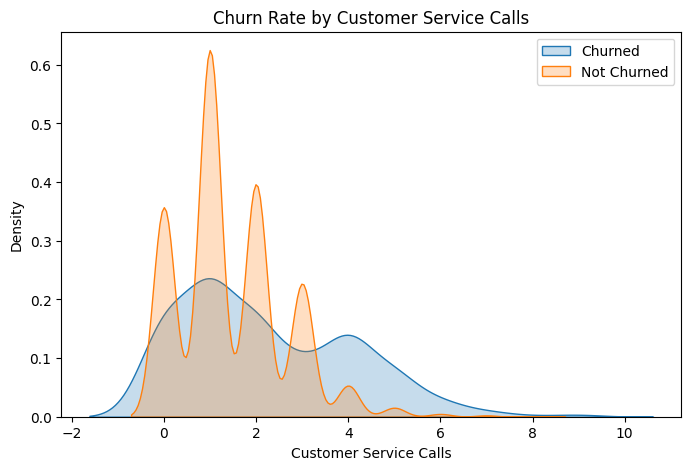

In [111]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data[data['churn'] == True]['customer service calls'], label="Churned", shade=True)
sns.kdeplot(data[data['churn'] == False]['customer service calls'], label="Not Churned", shade=True)
plt.title("Churn Rate by Customer Service Calls")
plt.xlabel("Customer Service Calls")
plt.ylabel("Density")
plt.legend()
plt.show()

We can clearly see that for customers who churn, there are a large number of customer service calls.

#### Pairplots for Numeric Features

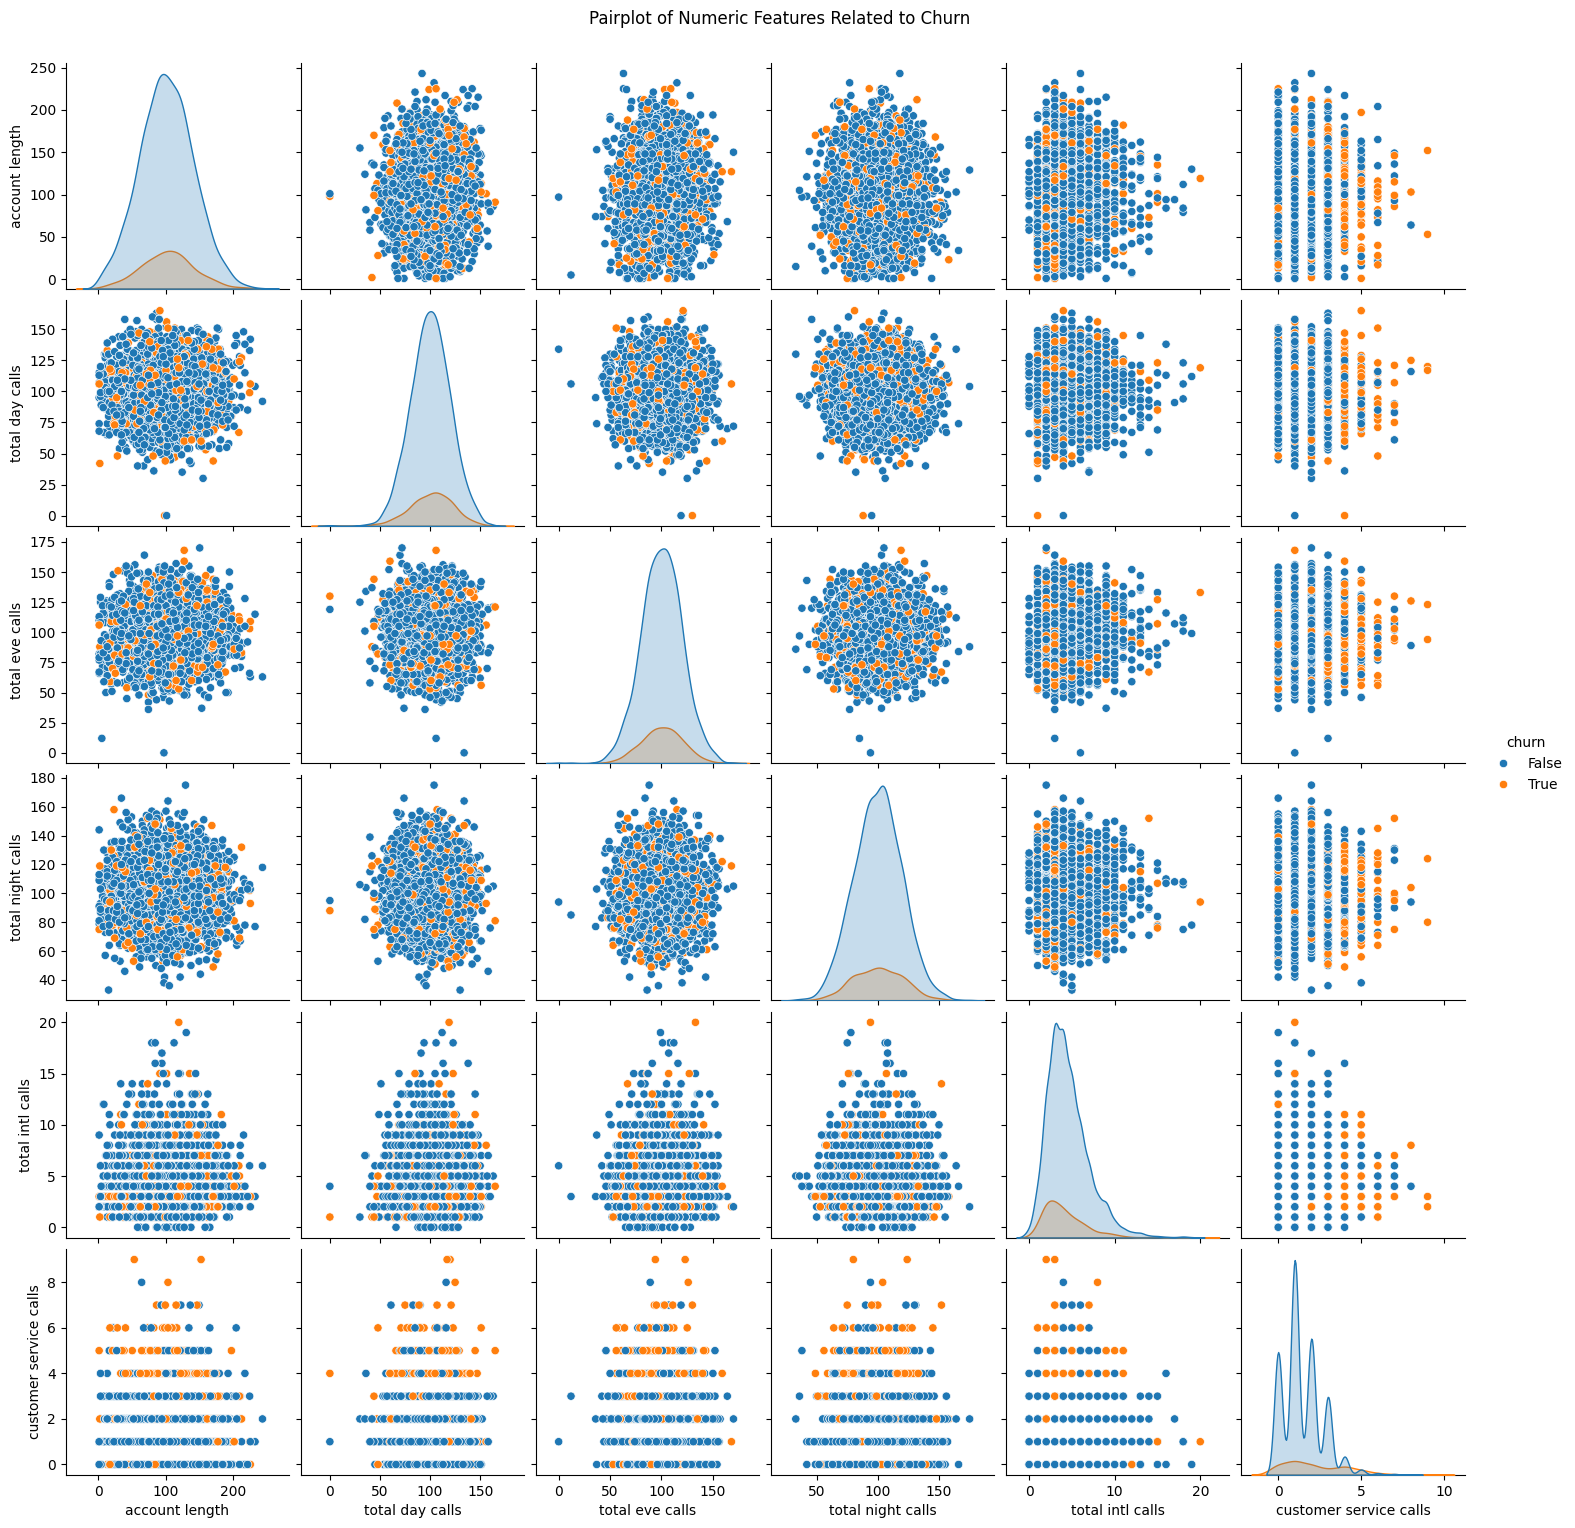

In [ ]:
data_temp = data[["account length","total day calls","total eve calls","total night calls",
                "total intl calls","customer service calls","churn"]]
sns.pairplot(data_temp, hue="churn",height=2.5)
plt.suptitle("Pairplot of Numeric Features Related to Churn", y=1.02)
plt.show();

#### Correlation Heatmap

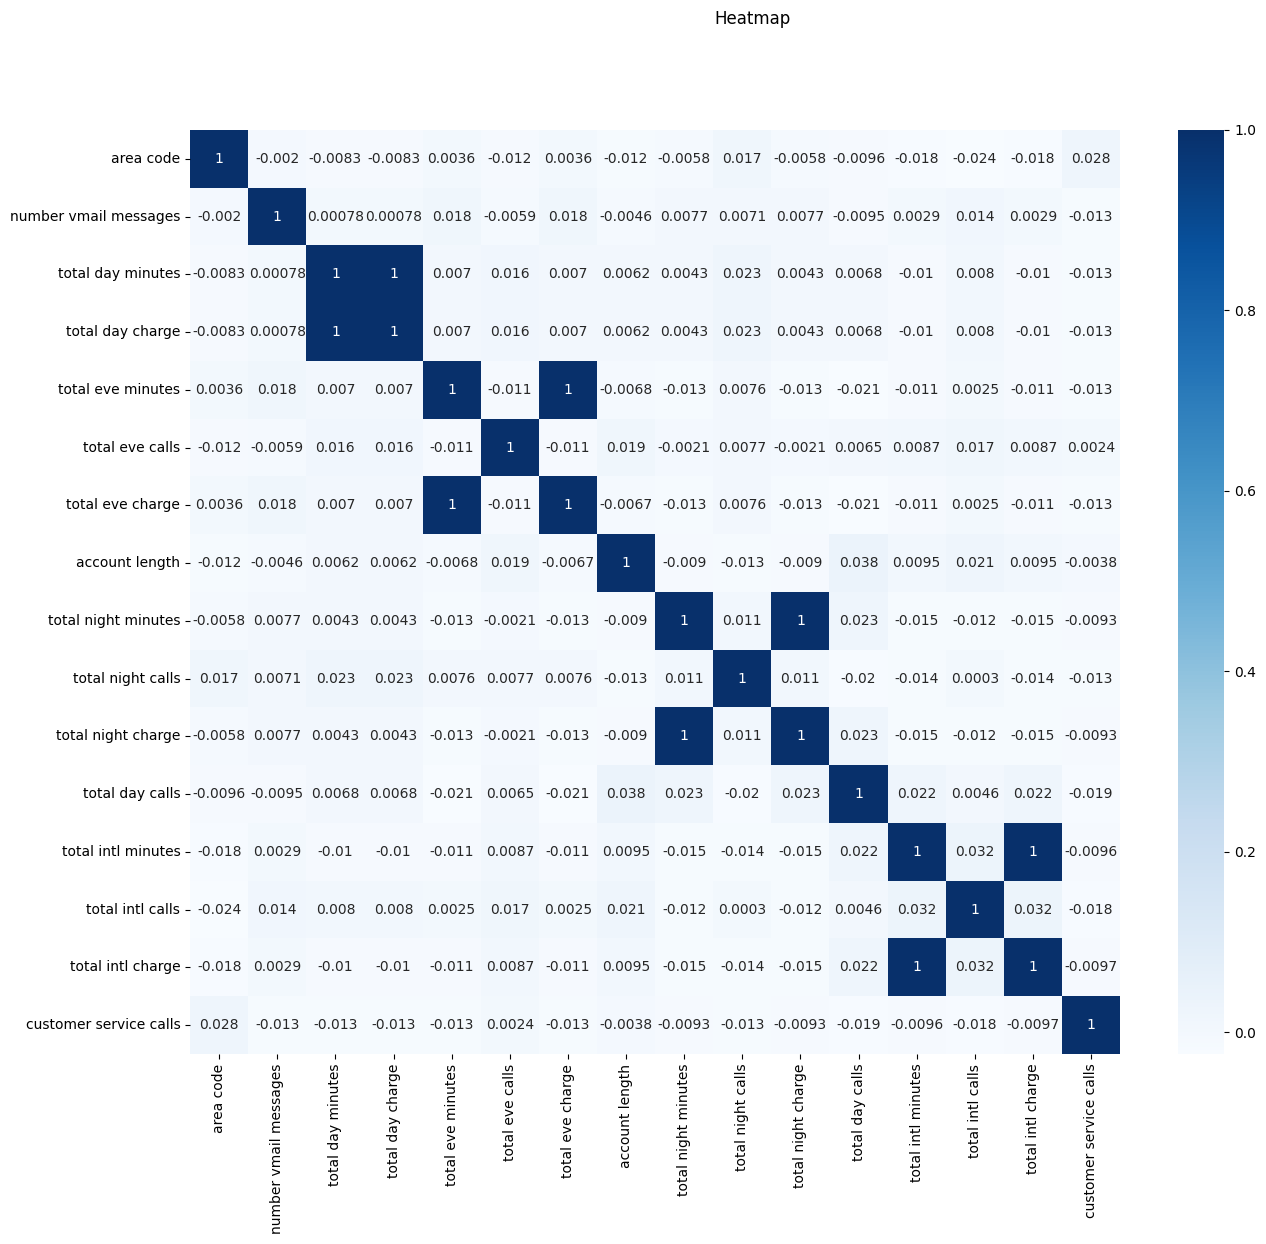

In [ ]:

data_cor = data[["area code",
               "number vmail messages",
               "total day minutes",
               "total day charge",
               "total eve minutes",
               "total eve calls",
               "total eve charge",
               "account length",
               "total night minutes",
               "total night calls",
               "total night charge",
               "total day calls",
               "total intl minutes",
               "total intl calls",
               "total intl charge",
               "customer service calls"]]
plt.subplots(figsize=(15,12))
plt.suptitle("Heatmap")
sns.heatmap(data_cor.corr(), annot=True, cmap='Blues')
plt.show()

* Most of the features are not correlated however some do have a perfect correlation.
  * Total day charge and total day minutes features are fully  
  * positively correlated.
  * Total eve charge and total eve minutes features are fully positively correlated.
  * Total night charge and total night minutes features are fully positively correlated.
  * Total int charge and total int minutes features are fully positively correlated.
* It makes sense for these features to be perfectly correlated because the charge is a direct result of the minutes used.
* The perfect correlation of 1 indicates the presence of perfect multicollinearity.

##### Dropping Highly-Correlated Features
Dropping features that have a perfect correlation.

In [ ]:
df = data.drop(columns=['total day charge', 'total eve charge', 'total night charge', 'total intl charge'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   object 
 3   international plan      3333 non-null   object 
 4   voice mail plan         3333 non-null   object 
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   int64  
 12  total intl minutes      3333 non-null   float64
 13  total intl calls        3333 non-null   int64  
 14  customer service calls  3333 non-null   

#### Categorical Features Analysis

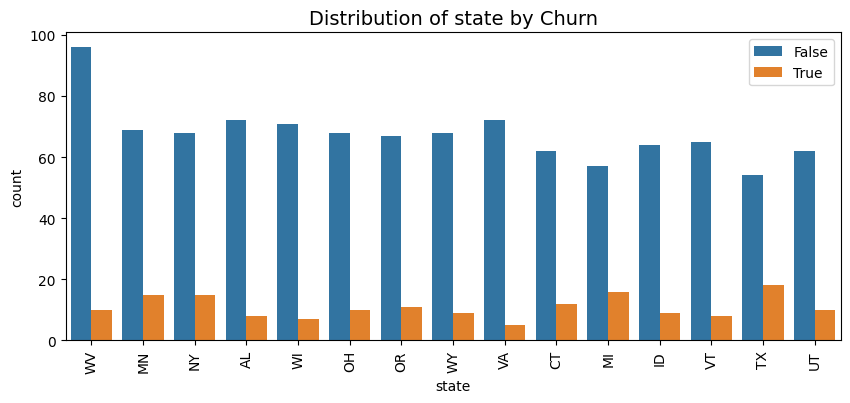

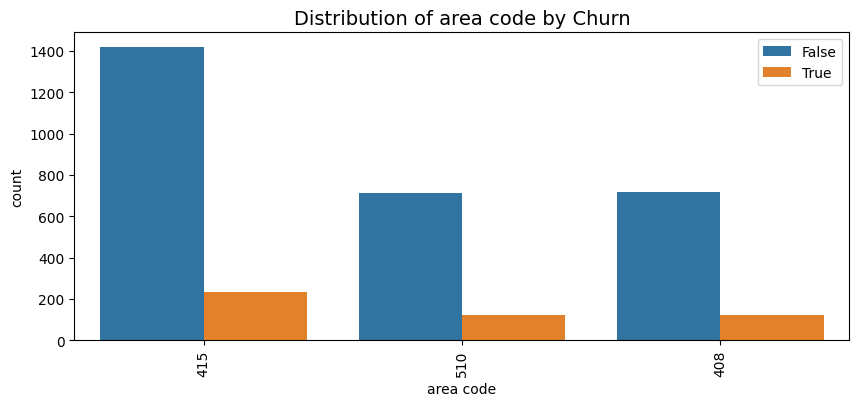

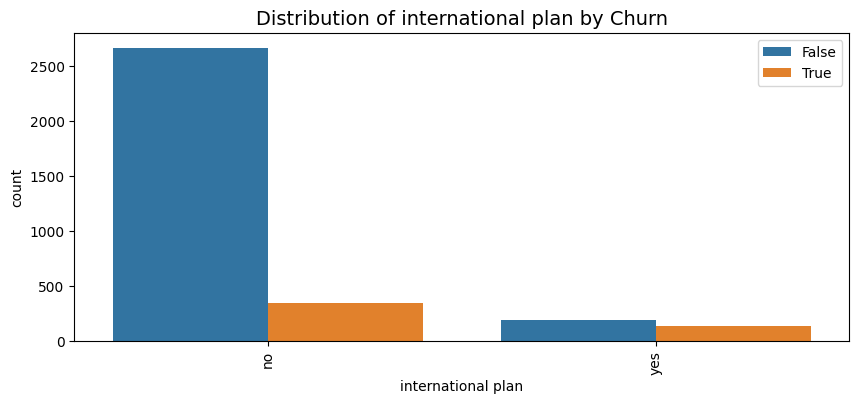

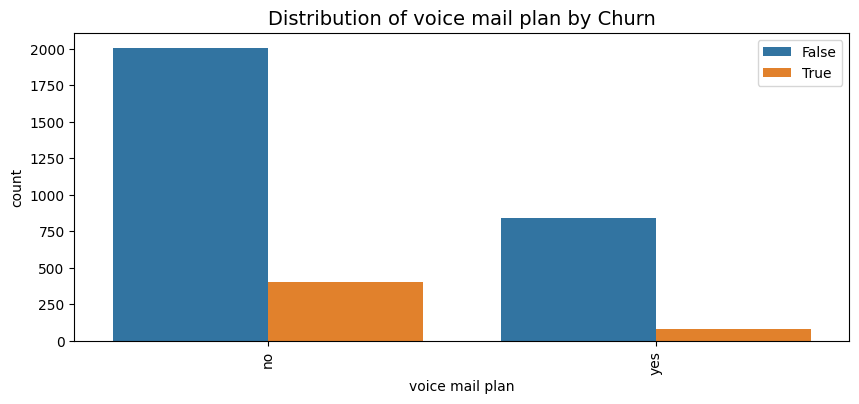

In [ ]:
categorical_cols = ['state','area code','international plan','voice mail plan']
for col in categorical_cols:
    plt.figure(figsize=(10,4))
    plt.title(f"Distribution of {col} by Churn", fontsize=14)
    sns.countplot(x=col, hue="churn", data=data,order= data[col].value_counts().iloc[0:15].index)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()

##### voice mail plan and international plan association with churn
In this case, we aim to determine whether there is a significant association between customer churn and two categorical variables: voice mail plan and international plan. The chi-squared test for independence will help us assess whether these variables are statistically related to churn or if they occur independently.

In [96]:
from scipy.stats import chi2_contingency

# Create contingency tables
voicemail_churn_table = pd.crosstab(df['voice mail plan'], df['churn'])
intlplan_churn_table = pd.crosstab(df['international plan'], df['churn'])

# Perform Chi-square tests
chi2_voicemail, p_voicemail, _, _ = chi2_contingency(voicemail_churn_table)
chi2_intlplan, p_intlplan, _, _ = chi2_contingency(intlplan_churn_table)

# Print results
print("Chi-squared statistic and p-value for 'voice mail plan' and 'churn':")
print(f"Chi-squared: {chi2_voicemail:.5f}, p-value: {p_voicemail:.5e}\n")

print("Chi-squared statistic and p-value for 'international plan' and 'churn':")
print(f"Chi-squared: {chi2_intlplan:.5f}, p-value: {p_intlplan:.5e}")

Chi-squared statistic and p-value for 'voice mail plan' and 'churn':
Chi-squared: 34.13166, p-value: 5.15064e-09

Chi-squared statistic and p-value for 'international plan' and 'churn':
Chi-squared: 222.56576, p-value: 2.49311e-50


Voice Mail Plan vs. Churn

* Chi-Squared Statistic: 34.13
* p-value: 5.15e-09

The low p-value (< 0.05) suggests a statistically significant relationship between having a voice mail plan and customer churn. However, the chi-squared value is moderate, indicating that while there is a relationship, the strength of association may not be very strong.

International Plan vs. Churn

* Chi-Squared Statistic: 222.57
* p-value: 2.49e-50

The very low p-value confirms a highly significant association between having an international plan and customer churn. Additionally, the very high chi-squared statistic (222.57) suggests a stronger relationship compared to the voice mail plan. This indicates that customers with an international plan are much more likely to churn than those without.

## Preprocessing

To ensure the dataset is clean and ready for modeling, we need to apply data preprocessing techniques such as encoding categorical variables, feature scaling, and splitting the dataset.

In [ ]:
for col in categorical_cols:
  print(f'The variable "{col}" has {df[col].nunique()} variables: {df[col].unique()} \n')


The variable "state" has 51 variables: ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND'] 

The variable "area code" has 3 variables: ['415' '408' '510'] 

The variable "international plan" has 2 variables: ['no' 'yes'] 

The variable "voice mail plan" has 2 variables: ['yes' 'no'] 



#### Encoding

##### Binary Encoding

Transforming "Churn" into 0 (false) and 1 (true)

In [ ]:
df['churn'] = df['churn'].map({True: 1, False: 0})
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,OH,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,NJ,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,OH,84,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,OK,75,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


Transform "international plan" and "voice mail plan" into 0s and 1s.

In [ ]:
# Define the columns to encode
yes_no_cols = ["international plan", "voice mail plan"]
# Convert "yes" to 1 and "no" to 0
df[yes_no_cols] = df[yes_no_cols].applymap(lambda x: 1 if x == 'yes' else 0)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,KS,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,NaN
1,OH,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,NaN
2,NJ,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,NaN
3,OH,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,NaN
4,OK,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,NaN


##### One-Hot Encoding
Transforming 'state' and 'area code' features into dummy variables as 0 and 1

In [ ]:
# One-Hot Encoding for 'state' column
dummy_df_state = pd.get_dummies(df["state"], dtype=np.int64, prefix="state_is")
# One-Hot Encoding for 'area code' column
dummy_df_area_code = pd.get_dummies(df["area code"], dtype=np.int64, prefix="area_code_is")
# Concatenate the original dataset with the new dummy (encoded) columns
encoded_df = pd.concat([df, dummy_df_state, dummy_df_area_code], axis=1)
# Remove duplicate columns (if any were unintentionally created)
encoded_df = encoded_df.loc[:, ~encoded_df.columns.duplicated()]
# Drop the original categorical columns ('state' and 'area code') since they are now encoded
encoded_df = encoded_df.drop(['state', 'area code'], axis=1)
# Display the first 5 rows of the updated dataframe
encoded_df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,...,state_is_UT,state_is_VA,state_is_VT,state_is_WA,state_is_WI,state_is_WV,state_is_WY,area_code_is_408,area_code_is_415,area_code_is_510
0,128,0,1,25,265.1,110,197.4,99,244.7,91,...,0,0,0,0,0,0,0,0,1,0
1,107,0,1,26,161.6,123,195.5,103,254.4,103,...,0,0,0,0,0,0,0,0,1,0
2,137,0,0,0,243.4,114,121.2,110,162.6,104,...,0,0,0,0,0,0,0,0,1,0
3,84,1,0,0,299.4,71,61.9,88,196.9,89,...,0,0,0,0,0,0,0,1,0,0
4,75,1,0,0,166.7,113,148.3,122,186.9,121,...,0,0,0,0,0,0,0,0,1,0


#### Scaling

Feature scaling is the process of normalizing or standardizing numerical data so that different features have a comparable range.

In [ ]:

from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler
transformer = MinMaxScaler()
# Function to scale a single column using MinMaxScaler
def scaling(columns):
    return transformer.fit_transform(encoded_df[columns].values.reshape(-1, 1))

# Loop through all numerical columns and apply MinMax scaling
for i in encoded_df.select_dtypes(include=[np.number]).columns:
    encoded_df[i] = scaling(i)

# Display the first 5 rows of the scaled dataframe
encoded_df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,...,state_is_UT,state_is_VA,state_is_VT,state_is_WA,state_is_WI,state_is_WV,state_is_WY,area_code_is_408,area_code_is_415,area_code_is_510
0,0.524793,0.0,1.0,0.490196,0.755701,0.666667,0.542755,0.582353,0.595750,0.408451,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.438017,0.0,1.0,0.509804,0.460661,0.745455,0.537531,0.605882,0.621840,0.492958,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.561983,0.0,0.0,0.000000,0.693843,0.690909,0.333242,0.647059,0.374933,0.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.342975,1.0,0.0,0.000000,0.853478,0.430303,0.170195,0.517647,0.467187,0.394366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.305785,1.0,0.0,0.000000,0.475200,0.684848,0.407754,0.717647,0.440290,0.619718,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Modeling

The target variable is categorical. The telecom company wants to classify customers into "likely to churn" or "likely to stay".

### Classification

**Classification** is the ideal approach for predicting customer churn because the target variable is categorical, representing whether a customer will churn (1) or stay (0). Unlike regression, which predicts continuous values, classification models are specifically designed to handle binary outcomes, making them more suitable for this task. Additionally, classification provides probability scores, allowing businesses to assess churn risk and prioritize retention strategies effectively.

##### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Define the target variable (y) and features (X)
X = encoded_df.drop(columns=['churn'])  # Drop the target column
y = encoded_df['churn']  # Target variable

# Perform the train-test split (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Display dataset sizes
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 2499 samples
Testing set size: 834 samples


#### Logistic Regression

model 1
Accuracy: 0.86810551558753
Recall: 0.23140495867768596
Precision: 0.6222222222222222
F1-score: 0.3373493975903614
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       713
         1.0       0.62      0.23      0.34       121

    accuracy                           0.87       834
   macro avg       0.75      0.60      0.63       834
weighted avg       0.84      0.87      0.84       834



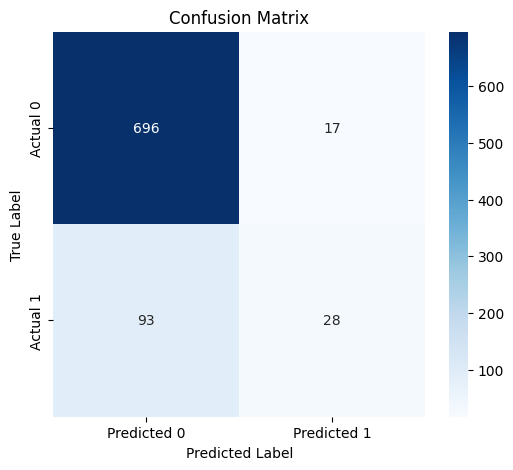

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('model 1')
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

# Classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Churn Prediction Performance
* The model achieved an accuracy of 86.81%, meaning it correctly classified ~87% of the customers as either churners or non-churners.
* Recall (23.14%) → The model only correctly identified 23% of actual churners.
 This is very low, meaning many customers who actually churn are misclassified as non-churners.
* Precision (62.22%) → When the model predicts churn, it's correct 62% of the time.
* F1-score (33.73%) → The balance between precision & recall is weak, meaning the model struggles with correctly identifying churners.

For Non-Churner Prediction Performance
* High precision (88%) and recall (98%), meaning the model is very good at identifying customers who do NOT churn.
* This suggests that the model is biased towards predicting customers as non-churners, which explains the low recall for churners.

#### Decision Tree

Accuracy: 0.9052757793764988
Recall: 0.6528925619834711
Precision: 0.6810344827586207
F1-score: 0.6666666666666666
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94       713
         1.0       0.68      0.65      0.67       121

    accuracy                           0.91       834
   macro avg       0.81      0.80      0.81       834
weighted avg       0.90      0.91      0.90       834



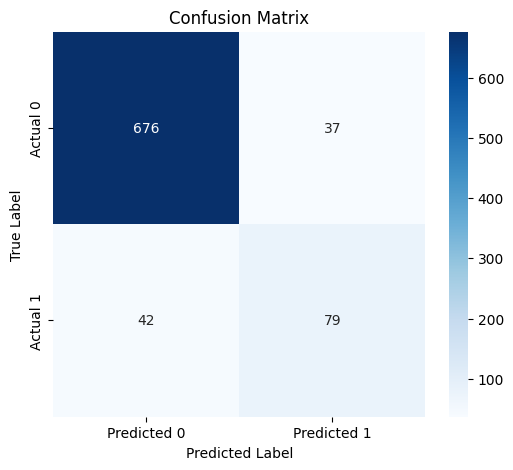

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the decision tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

# Classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Overall Model Performance
* Accuracy: 90.53% → The model correctly classifies ~91% of the customers.
* Improved Recall (65%) → The model now detects 65% of actual churners, a significant improvement from the previous 23%.
* Balanced Precision (68%) & F1-Score (67%) → The model maintains a good balance between false positives and false negatives.

Churn Prediction Performance
* Recall (65%) means the model captures more churners, reducing the risk of missing at-risk customers.
* Precision (68%) means that when the model predicts churn, it is correct 68% of the time.
* F1-score (67%) is significantly improved, showing a better balance between detecting churners and minimizing false positives.

Non-Churner Prediction Performance
* High precision (94%) and recall (95%), meaning the model still correctly classifies most non-churners.
* The model was better at differentiating between churners and non-churners.

#### Random Forest

Accuracy: 0.919664268585132
Recall: 0.5041322314049587
Precision: 0.8970588235294118
F1-score: 0.6455026455026455
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       713
         1.0       0.90      0.50      0.65       121

    accuracy                           0.92       834
   macro avg       0.91      0.75      0.80       834
weighted avg       0.92      0.92      0.91       834



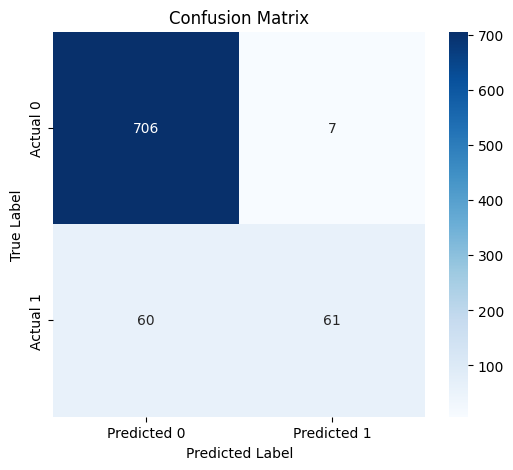

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the random forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

# Classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Overall Model Performance
* Accuracy: 91.97% → The model correctly classifies ~92% of the customers, an improvement from previous models.
* High Precision (90%) → When the model predicts churn, it is correct 90% of the time, reducing false positives.
* Moderate Recall (50%) → The model captures 50% of actual churners, lower than the previous 65%, meaning it still misses some at-risk customers.
* F1-score (64.55%) → Balances precision and recall but is slightly lower than the previous model.

Churn Prediction Performance
* High Precision (90%) → Fewer false positives; when the model flags a churner, it's mostly correct.
* Lower Recall (50%) → The model fails to identify 50% of actual churners, which could be problematic for retention strategies.

Non-Churner Prediction Performance

* Excellent Precision (92%) and Recall (99%) → The model is very strong at identifying non-churners.
* Bias Toward Non-Churners → The model favors predicting customers as non-churners, which explains the low recall for churners.

#### K-NN

Accuracy: 0.8273381294964028
Recall: 0.06611570247933884
Precision: 0.20512820512820512
F1-score: 0.1
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.90       713
         1.0       0.21      0.07      0.10       121

    accuracy                           0.83       834
   macro avg       0.53      0.51      0.50       834
weighted avg       0.76      0.83      0.79       834



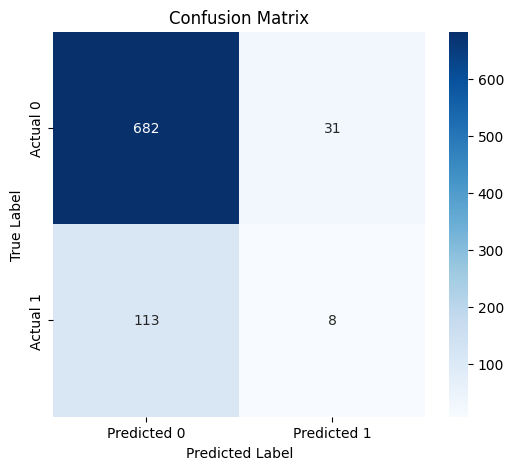

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the K-NN classifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

# Classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Overall Model Performance
* Accuracy: 82.73% → The model correctly classifies ~83% of the customers.
* Very Low Recall (6.6%) → The model detects only 6.6% of actual churners, meaning most churners go undetected.
* Low Precision (20.5%) → When the model predicts churn, it is only correct 20.5% of the time, meaning high false positives.
* F1-score (10%) → Extremely poor balance between precision and recall.

#### SVM

Accuracy: 0.8573141486810552
Recall: 0.01652892561983471
Precision: 1.0
F1-score: 0.032520325203252036
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92       713
         1.0       1.00      0.02      0.03       121

    accuracy                           0.86       834
   macro avg       0.93      0.51      0.48       834
weighted avg       0.88      0.86      0.79       834



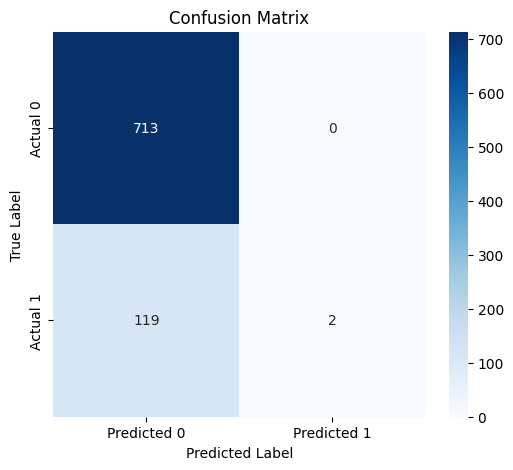

In [ ]:
from sklearn.svm import SVC

# Initialize and train the SVC model
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

# Classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Overall Model Performance
* Accuracy: 85.73% → The model correctly classifies ~86% of the customers..
* Very Low Recall (1.65%) → The model only identifies 1.65% of actual churners, meaning almost all churners are missed.
* Perfect Precision (100%) → But this is misleading because it only predicts churn for a tiny fraction of cases.
* F1-score (3.25%) → Extremely poor balance between precision and recall.

#### Naive Bayes

Accuracy: 0.5479616306954437
Recall: 0.6033057851239669
Precision: 0.18159203980099503
F1-score: 0.27915869980879543
              precision    recall  f1-score   support

         0.0       0.89      0.54      0.67       713
         1.0       0.18      0.60      0.28       121

    accuracy                           0.55       834
   macro avg       0.54      0.57      0.47       834
weighted avg       0.79      0.55      0.61       834



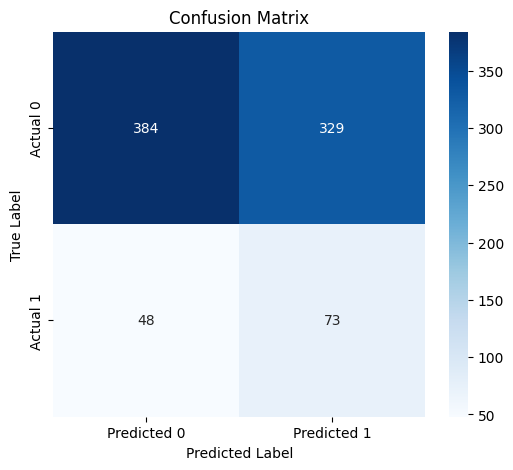

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1}")

# Classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Overall Model Performance
* Accuracy: 54.8% → Very low accuracy, indicating poor overall classification.
* Moderate Recall (60.3%) → The model correctly identifies 60.3% of actual churners.
* Low Precision (18.2%) → Many of the churn predictions are false positives, meaning the model often misclassifies non-churners as churners.
* F1-score (27.9%) → Weak balance between precision and recall, but recall is prioritized.

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Define hyperparameter grids
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10, 100],
        "solver": ["liblinear", "lbfgs"]
    },
    "Decision Tree": {
        "max_depth": [3, 5, 10, None],
        "min_samples_split": [2, 5, 10]
    },
    "Random Forest": {
        "n_estimators": [10, 50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5, 10]
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 9, 11],
        "metric": ["euclidean", "manhattan"]
    },
    "Support Vector Machine": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    },
    "Naïve Bayes": {}  # No hyperparameters for GaussianNB
}

# Store models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "Naïve Bayes": GaussianNB()
}

# Dictionary to store best models
best_models = {}

# Loop through each model and perform GridSearchCV
for name, model in models.items():
    if param_grids[name]:  # Skip Naïve Bayes (no hyperparameters)
        search = GridSearchCV(model, param_grids[name], cv=5, scoring='roc_auc', n_jobs=-1)
        search.fit(X_train, y_train)  # Use scaled data where needed
        best_models[name] = search.best_estimator_
        print(f"🔹 Best parameters for {name}: {search.best_params_}")
    else:
        best_models[name] = model.fit(X_train, y_train)


🔹 Best parameters for Logistic Regression: {'C': 1, 'solver': 'lbfgs'}
🔹 Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 10}
🔹 Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
🔹 Best parameters for K-Nearest Neighbors: {'metric': 'manhattan', 'n_neighbors': 11}
🔹 Best parameters for Support Vector Machine: {'C': 10, 'kernel': 'rbf'}


After identifying the optimal hyperparameters for each model, the next step is to retrain them using these tuned parameters to maximize performance. By incorporating the best values—such as setting C=1 for Logistic Regression, adjusting the tree depth for Decision Trees and Random Forest, and optimizing n_neighbors for K-Nearest Neighbors—we ensure that each model is fine-tuned for better predictive accuracy. Training the models with these best hyperparameters on the dataset allows us to achieve improved generalization, reducing overfitting while enhancing their ability to distinguish between customers who will churn and those who will remain. This refined training process sets the foundation for robust evaluation and model selection in the next steps

In [ ]:
 #Train models with the best parameters
log_reg = LogisticRegression(C=1, solver='lbfgs')
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=5)
rf_model = RandomForestClassifier(n_estimators=50, max_depth=None, min_samples_split=2)
knn_model = KNeighborsClassifier(n_neighbors=11, metric='manhattan')
svc_model = SVC(C=10, kernel='rbf', probability=True)  # Enable probability for AUC evaluation

# Fit models on training data
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "K-Nearest Neighbors": knn_model,
    "Support Vector Machine": svc_model
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"✅ {name} trained with best parameters!")

✅ Logistic Regression trained with best parameters!
✅ Decision Tree trained with best parameters!
✅ Random Forest trained with best parameters!
✅ K-Nearest Neighbors trained with best parameters!
✅ Support Vector Machine trained with best parameters!


Now that all models have been retrained using the best hyperparameters, the next step is to systematically evaluate their performance using key metrics such as Accuracy, Precision, Recall, F1-score, and AUC. By re-assessing each model with these metrics, we can determine whether the optimized parameters have led to improved predictive capability, especially in identifying customer churn. Additionally, comparing the new results with the previous ones will help in understanding the impact of hyperparameter tuning—whether it has enhanced model performance, reduced overfitting, or improved the balance between precision and recall. This comparison will ultimately guide the selection of the best-performing model for deployment in predicting customer churn effectively.

## Model Evaluation


After training the models with the best hyperparameters, evaluating their performance is crucial to determine their effectiveness in predicting customer churn.

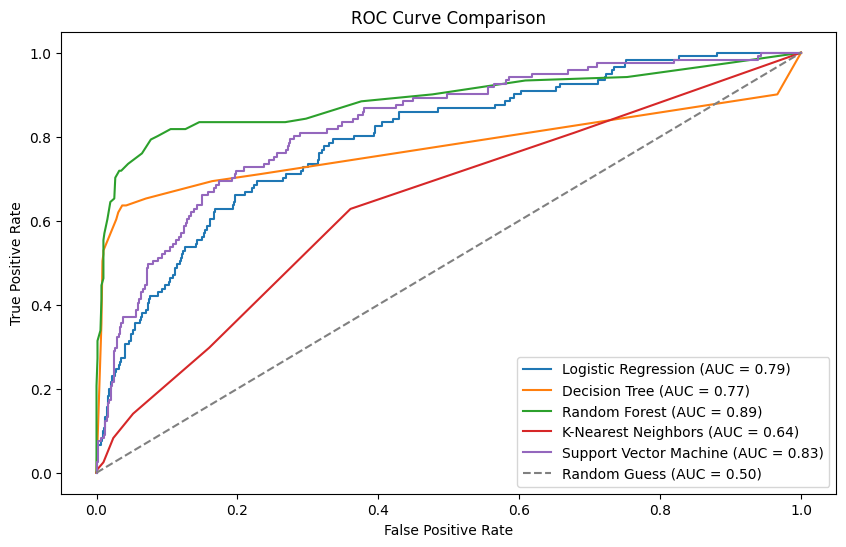

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Plot ROC Curve for each model
plt.figure(figsize=(10, 6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):  # Check if the model supports probability predictions
        y_probs = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        auc_score = roc_auc_score(y_test, y_probs)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess (AUC = 0.50)")

# Formatting
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

The ROC (Receiver Operating Characteristic) curve shows the trade-off between the True Positive Rate (TPR) and the False Positive Rate (FPR) across different classification thresholds.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Store models with appropriate test data
models = {
    "Logistic Regression": (log_reg, X_test),
    "Decision Tree": (dt_model, X_test),
    "Random Forest": (rf_model, X_test),
    "K-Nearest Neighbors": (knn_model, X_test),
    "Support Vector Machine": (svc_model, X_test),
    "Naïve Bayes": (nb_model, X_test)
}

# Evaluate all models
for name, (model, X_test_data) in models.items():
    y_pred = model.predict(X_test_data)

    # Check if model supports predict_proba()
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test_data)[:, 1]  # Probability for churn (class 1)
        auc = roc_auc_score(y_test, y_probs)
    else:
        auc = "N/A"  # AUC is not available for models without predict_proba()

    print(f"\n🔹 Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"AUC Score: {auc}")
    print(classification_report(y_test, y_pred))


🔹 Model: Logistic Regression
Accuracy: 0.8681
AUC Score: 0.7944895853859261
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       713
         1.0       0.62      0.23      0.34       121

    accuracy                           0.87       834
   macro avg       0.75      0.60      0.63       834
weighted avg       0.84      0.87      0.84       834


🔹 Model: Decision Tree
Accuracy: 0.9185
AUC Score: 0.7745470773011255
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95       713
         1.0       0.78      0.60      0.68       121

    accuracy                           0.92       834
   macro avg       0.86      0.79      0.82       834
weighted avg       0.91      0.92      0.91       834


🔹 Model: Random Forest
Accuracy: 0.9137
AUC Score: 0.8882732720549883
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       713
         1.0      

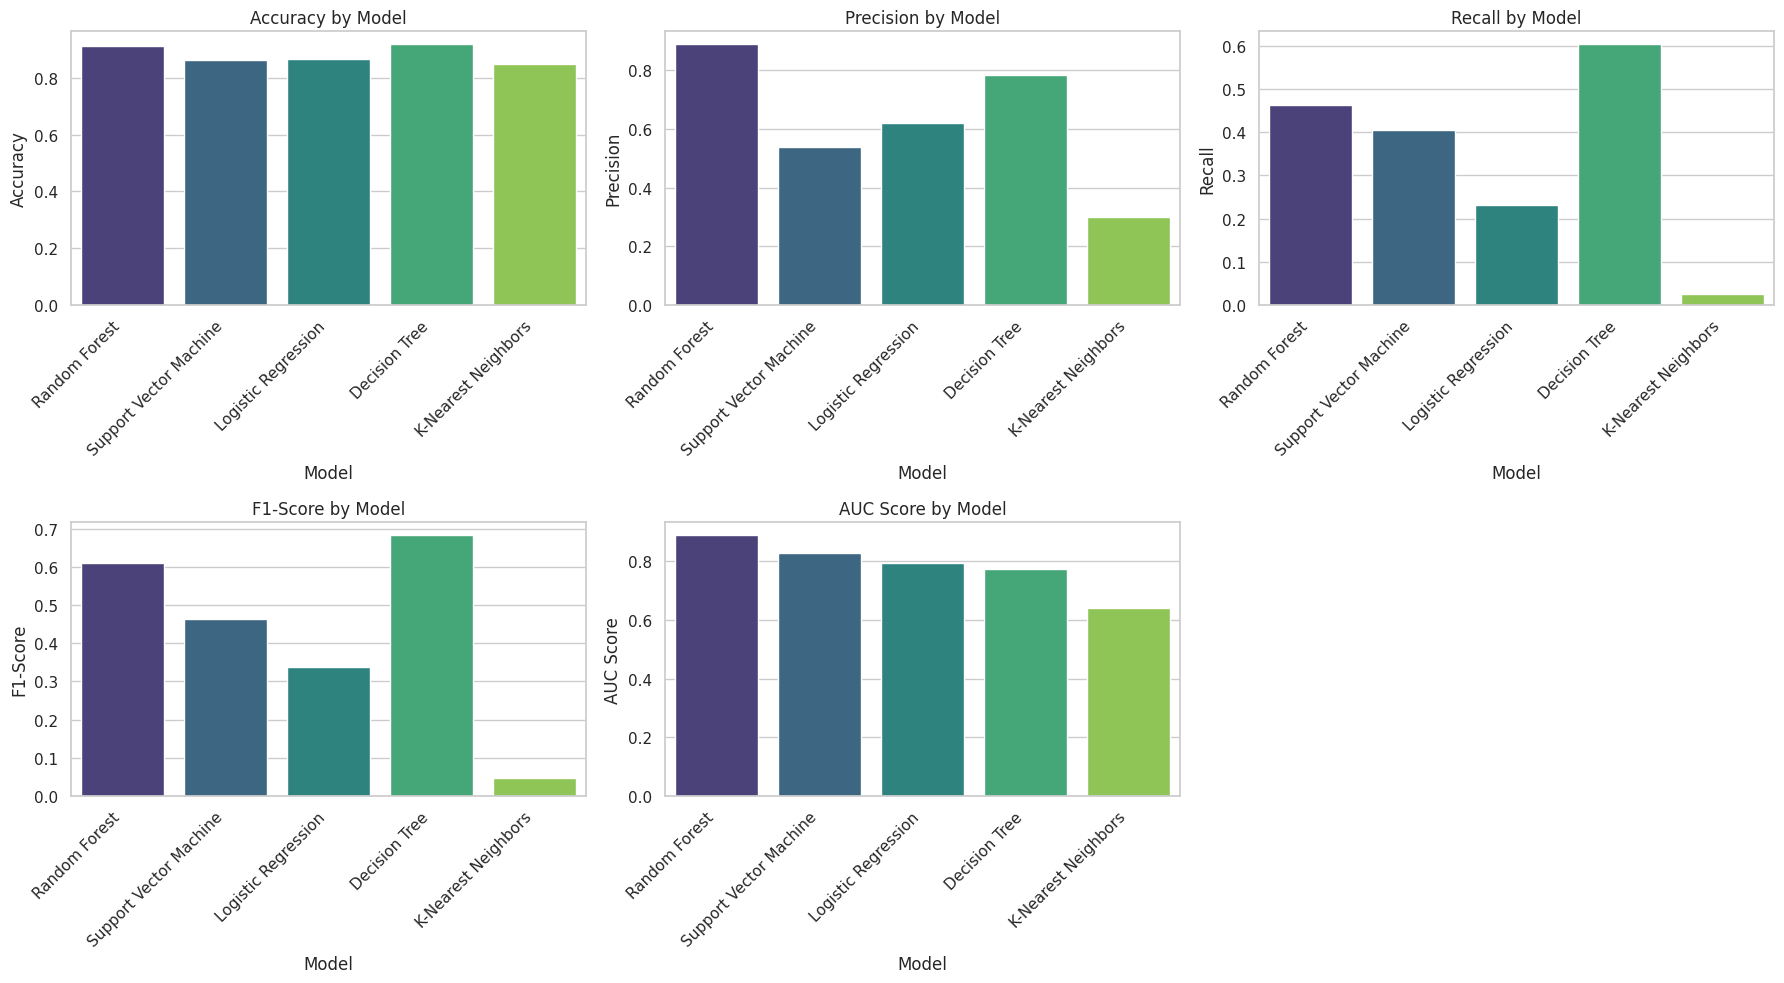

In [ ]:
# Set seaborn style
sns.set(style="whitegrid")

# Define metrics to visualize
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "AUC Score"]

# Create subplots: 2 rows, first row has 3 plots, second row has 2
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))  # Adjusted layout

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot each metric
for i, metric in enumerate(metrics):
    sns.barplot(x="Model", y=metric, data=results_df, ax=axes[i], palette="viridis")
    axes[i].set_title(f"{metric} by Model")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha="right")

# Hide the unused subplot (last subplot in the second row)
fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Sort the results table by AUC Score in descending order
sorted_results_df = results_df.sort_values(by="AUC Score", ascending=False)

# Display the sorted table
print(sorted_results_df)

                    Model  Accuracy  Precision    Recall  F1-Score  AUC Score
2           Random Forest  0.913669   0.888889  0.462810  0.608696   0.888273
4  Support Vector Machine  0.863309   0.538462  0.404959  0.462264   0.827095
0     Logistic Regression  0.868106   0.622222  0.231405  0.337349   0.794490
1           Decision Tree  0.918465   0.784946  0.603306  0.682243   0.774547
3     K-Nearest Neighbors  0.850120   0.300000  0.024793  0.045802   0.640067


The Random Forest model stands out as the best-performing classifier for predicting customer churn, achieving the highest AUC score (0.888) and a solid balance between precision and recall. This indicates that the model effectively differentiates between customers who will churn and those who will stay. Its ability to capture complex patterns makes it a strong candidate for deployment. Additionally, the Decision Tree model performs well, with a high accuracy (0.918) and a balanced F1-score, making it a good alternative. However, its AUC score (0.774) suggests that it may not generalize as well as Random Forest, potentially leading to overfitting.

The Support Vector Machine (SVM) is another strong contender, securing an AUC score of 0.827 and delivering a fair balance between precision and recall. Although it does not surpass the Random Forest model, it still offers valuable predictive insights and can be useful in certain scenarios, especially when interpretability is a concern. Meanwhile, Logistic Regression shows moderate performance, with an AUC score of 0.794, but it struggles with recall, indicating that it misses a significant portion of churn cases. Further improvements, such as feature engineering or handling class imbalance, could enhance its performance.

At the lower end of the spectrum, K-Nearest Neighbors (KNN) is the weakest model, with poor recall and F1-score, making it unreliable for predicting churn. Its difficulty in capturing meaningful relationships within the dataset suggests it may not be well-suited for high-dimensional classification tasks. Given these results, Random Forest remains the top choice, while Decision Tree and SVM offer alternative solutions, and Logistic Regression requires refinement. KNN, on the other hand, is not a viable option for this problem.

## Conclusion

The analysis of customer churn at SyriaTel reveals key insights into the factors that influence whether a customer decides to leave the service. Through Exploratory Data Analysis (EDA), statistical tests, and machine learning models, we identified customer service calls, total day minutes, and total day charge as the most significant contributors to churn.

One of the strongest findings comes from our Chi-Square tests, which examined the relationship between categorical variables and churn. The test results show that:

The voice mail plan has a statistically significant relationship with churn (Chi-Square = 34.13, p-value = 5.15e-09), suggesting that customers with a voicemail plan might have different churn behaviors.
The international plan is even more strongly associated with churn (Chi-Square = 222.57, p-value = 2.49e-50), indicating that customers who opt for an international plan are at a much higher risk of leaving the company.

Further analysis of customer service calls reveals that customers who make multiple calls to support are more likely to churn. This suggests dissatisfaction with the service, potentially due to unresolved issues. Similarly, customers with higher total day minutes and total day charges tend to churn at a higher rate, possibly due to pricing concerns or seeking better offers elsewhere.

After testing various algorithms, we found that Random Forest performed the best, achieving an accuracy of 91.4% and an F1-score of 61%, indicating a strong balance between precision and recall.

## Recommendation


Based on the analysis and predictive modeling, several strategies are recommended to reduce churn and improve customer retention at SyriaTel. First,is to improve customer service efficiency, as customers with higher customer service calls are more likely to churn, indicating dissatisfaction. To address this, SyriaTel should implement a priority resolution system for frequent callers and introduce AI-driven chatbots and self-service portals to resolve common issues faster.

Personalized retention offers should also be a key focus. High-usage customers, particularly those with high total day minutes and total day charges, are more prone to churn. To retain them, SyriaTel can offer personalized discounts or loyalty plans and use predictive modeling to target at-risk customers with tailored promotions before they decide to leave.

Another critical area is the international plan, which has shown the highest association with churn. To mitigate this risk, SyriaTel should review the pricing and benefits of international plans to ensure they remain competitive. Additionally, offering exclusive deals or loyalty incentives for international plan subscribers can enhance their perceived value and encourage retention.

Finally, leveraging data-driven decision-making can help SyriaTel stay ahead of churn trends. Machine learning models should be continuously refined to identify churn patterns early, while A/B testing can be used to experiment with different retention strategies and measure their effectiveness.